#TESLA STOCK PRICE PREDICTION

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader as web
import plotly.graph_objects as go
import re
import seaborn as sns

In [ ]:
tesla = web.DataReader('TSLA', data_source='yahoo', start='2016-01-01', end='2020-11-30')
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,46.276001,43.799999,46.144001,44.681999,34135500.0,44.681999
2016-01-05,45.377998,44.000000,45.271999,44.686001,15934000.0,44.686001
2016-01-06,44.009998,43.195999,44.000000,43.807999,18895500.0,43.807999
2016-01-07,43.688000,42.734001,42.838001,43.130001,17771500.0,43.130001
2016-01-08,44.088001,42.153999,43.571999,42.200001,18140500.0,42.200001


In [ ]:
tesla.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-23,526.000000,501.790009,503.500000,521.849976,50260300.0,521.849976
2020-11-24,559.989990,526.200012,540.400024,555.380005,53648500.0,555.380005
2020-11-25,574.000000,545.369995,550.059998,574.000000,48930200.0,574.000000
2020-11-27,598.780029,578.450012,581.159973,585.760010,37561100.0,585.760010
2020-11-30,607.799988,554.510010,602.210022,567.599976,63003100.0,567.599976


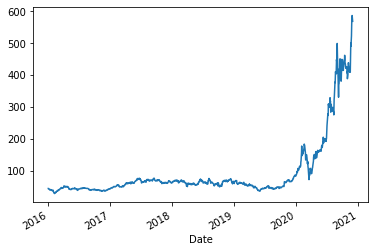

In [ ]:
tesla['Adj Close'].plot()

In [ ]:
df_final = tesla

In [ ]:

X=df_final.drop(['Adj Close'],axis=1)
X=X.drop(['Close'],axis=1)


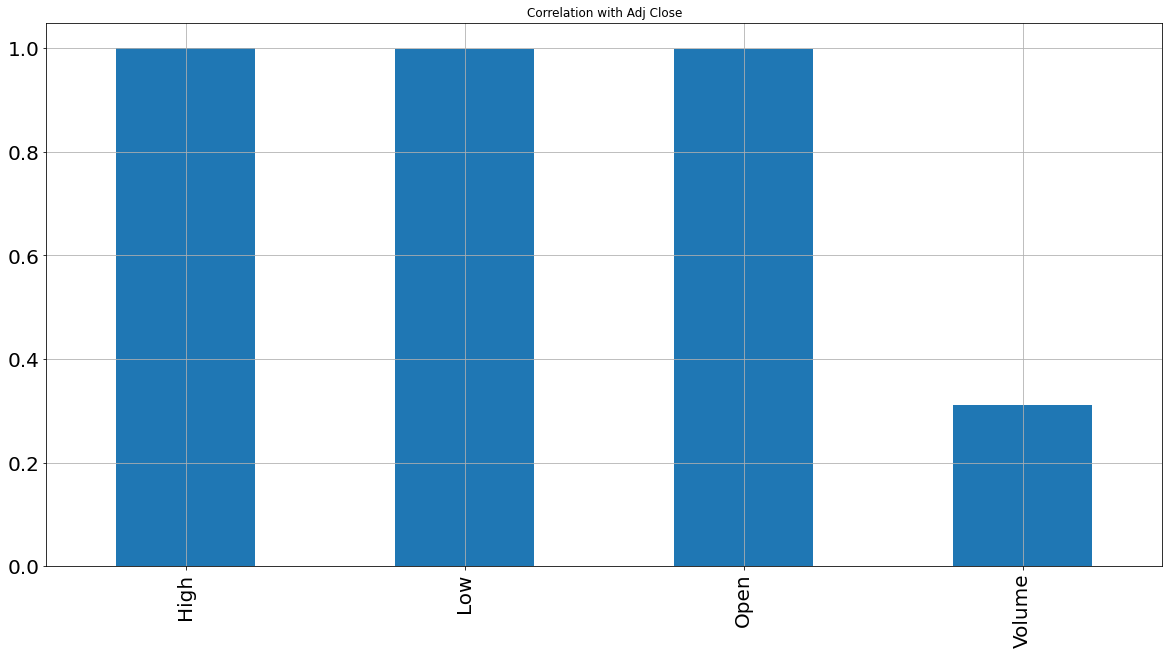

In [ ]:
X.corrwith(df_final['Adj Close']).plot.bar(
        figsize = (20, 10), title = "Correlation with Adj Close", fontsize = 20,
        rot = 90, grid = True)

In [ ]:
test = df_final
# Target column
target_adj_close = pd.DataFrame(test['Adj Close'])
display(test.head())

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,46.276001,43.799999,46.144001,44.681999,34135500.0,44.681999
2016-01-05,45.377998,44.000000,45.271999,44.686001,15934000.0,44.686001
2016-01-06,44.009998,43.195999,44.000000,43.807999,18895500.0,43.807999
2016-01-07,43.688000,42.734001,42.838001,43.130001,17771500.0,43.130001
2016-01-08,44.088001,42.153999,43.571999,42.200001,18140500.0,42.200001


In [ ]:
feature_columns = ['Open', 'High', 'Low', 'Volume']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,Open,High,Low,Volume
Date,,,,
2016-01-04,0.030815,0.026494,0.028333,0.087174
2016-01-05,0.029295,0.024937,0.028697,0.025764
2016-01-06,0.027078,0.022566,0.027235,0.035756
2016-01-07,0.025053,0.022007,0.026396,0.031964
2016-01-08,0.026332,0.022701,0.025342,0.033209


In [ ]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

# Shift target array because we want to predict the n + 1 day value


target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:-90]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())

,Open,High,Low,Volume
Date,,,,
2016-01-04,0.030815,0.026494,0.028333,0.087174
2016-01-05,0.029295,0.024937,0.028697,0.025764
2016-01-06,0.027078,0.022566,0.027235,0.035756
2016-01-07,0.025053,0.022007,0.026396,0.031964
2016-01-08,0.026332,0.022701,0.025342,0.033209


Shape of features :  (1237, 4)
Shape of target :  (1237, 1)


,Open,High,Low,Volume
Date,,,,
2020-11-20,0.818352,0.817443,0.837544,0.083046
2020-11-23,0.827955,0.858185,0.860679,0.141577
2020-11-24,0.892269,0.917113,0.905041,0.153008
2020-11-25,0.909106,0.941401,0.939881,0.137089
2020-11-27,0.963311,0.984362,1.000000,0.098731


,Adj Close
Date,
2020-11-20,521.849976
2020-11-23,555.380005
2020-11-24,574.000000
2020-11-25,585.760010
2020-11-27,567.599976



 -----After process------ 

Shape of features :  (1147, 4)
Shape of target :  (1147, 1)


,Adj Close
Date,
2020-07-17,328.600006
2020-07-20,313.671997
2020-07-21,318.466003
2020-07-22,302.614014
2020-07-23,283.399994


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM,Dense,Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model

In [ ]:

ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [ ]:
X_train.shape

(1043, 4)

In [ ]:
X_test.shape

(104, 4)

In [ ]:
y_train.shape

(1043,)

In [ ]:
y_test.shape

(104,)

In [ ]:
X_train =np.array(X_train)
X_test =np.array(X_test)

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# MODEL BUILDING & TRAINING

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(16, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=500, batch_size=8, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/500
131/131 [==============================] - 1s 4ms/step - loss: 2657.7632
Epoch 2/500
131/131 [==============================] - 0s 4ms/step - loss: 2630.9298
Epoch 3/500
131/131 [==============================] - 0s 4ms/step - loss: 2588.6600
Epoch 4/500
131/131 [==============================] - 0s 4ms/step - loss: 2520.4104
Epoch 5/500
131/131 [==============================] - 1s 4ms/step - loss: 2419.3874
Epoch 6/500
131/131 [==============================] - 0s 4ms/step - loss: 2279.1365
Epoch 7/500
131/131 [==============================] - 0s 4ms/step - loss: 2092.7979
Epoch 8/500
131/131 [==============================] - 1s 4ms/step - loss: 1872.4719
Epoch 9/500
131/131 [==============================] - 0s 4ms/step - loss: 1633.2163
Epoch 10/500
131/131 [==============================] - 0s 4ms/step - loss: 1389.5649
Epoch 11/500
131/131 [==============================] - 0s 4ms/step - loss: 1153.8369
Epoch 12/500
131/131 [==============================] - 0s 4ms/

In [ ]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)

The R2 score on the Train set is:	0.980
The R2 score on the Test set is:	0.872


In [ ]:
score_lstm= model_lstm.evaluate(X_tst_t, y_test, batch_size=1)

104/104 [==============================] - 0s 1ms/step - loss: 497.5872


In [ ]:
print('LSTM: %f'%score_lstm)

LSTM: 497.587189


In [ ]:
y_pred_test_LSTM = model_lstm.predict(X_tst_t)

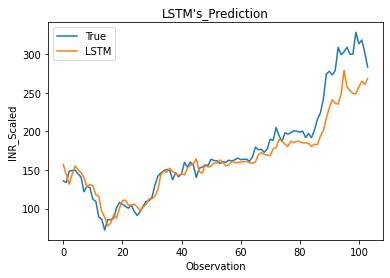

In [ ]:
plt.plot(y_test, label='True')
plt.plot(y_pred_test_LSTM, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()